# IPL Match (2022)

### Load the libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from plotly.offline import iplot
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IPL.csv")
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


### Basic information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

### Check the size of rows and columns of the dataset

In [6]:
print(f"your rows are {df.shape[0]} and your columns are {df.shape[1]}")

your rows are 74 and your columns are 20


### Now let's see how many columns and rows have null values in total.

In [7]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

### Which team won the most matches?

Text(0.5, 1.0, 'Most match win by team')

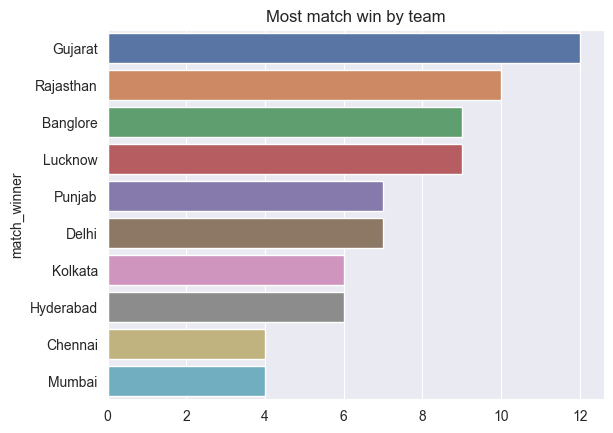

In [8]:
match_wins = df["match_winner"].value_counts()
sns.barplot(y = match_wins.index, x = match_wins.values, palette = "deep")
plt.title("Most match win by team")

### Toss Decision Trends

Text(0.5, 1.0, 'Toss decision trends')

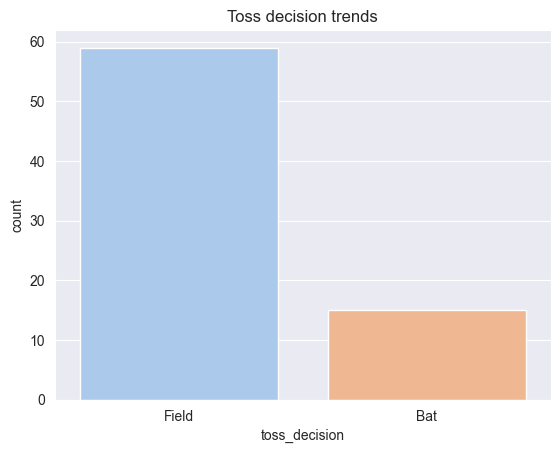

In [9]:
sns.countplot(x = df["toss_decision"], palette = "pastel")
plt.title("Toss decision trends")

### Toss winner vs Match winner

In [10]:
count = df[df["toss_winner"] == df["match_winner"]]["match_id"].count()
percentage = (count * 100) / df.shape[0]
percentage.round(2)

np.float64(48.65)

### How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by')

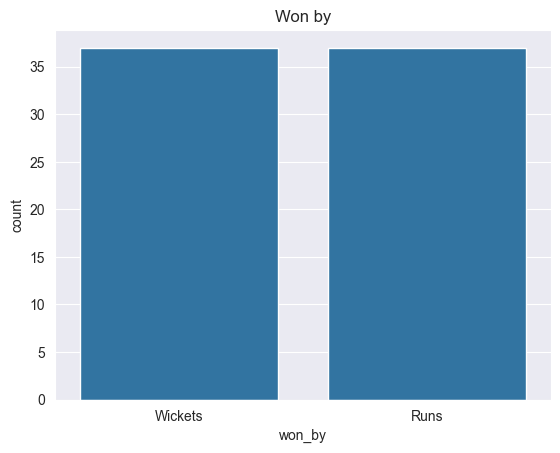

In [11]:
sns.countplot(x=df["won_by"])
plt.title("Won by")

### Most "Player of the Match" Awards

In [12]:
count = df["player_of_the_match"].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 player with player of the match')

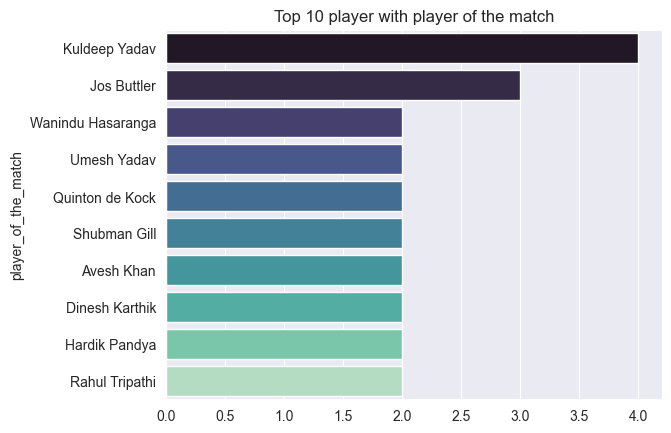

In [13]:
sns.barplot(x = count.values, y = count.index, palette = "mako")
plt.title("Top 10 player with player of the match")

### 2 Top Scorers

In [14]:
high = df.groupby("top_scorer")["highscore"].sum().sort_values(ascending = False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

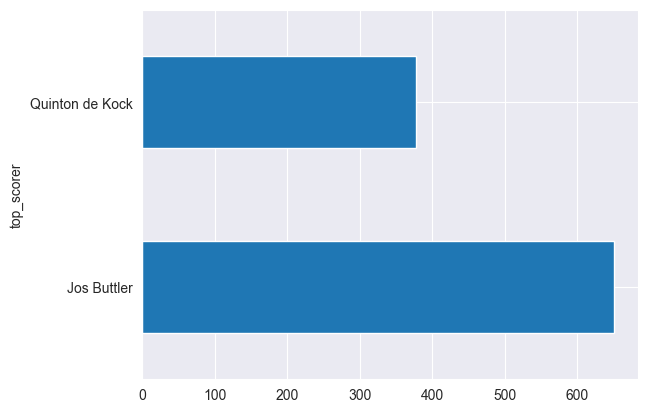

In [15]:
high.plot(kind="barh")

### 10 Best Bowling Figures

In [16]:
df["highest_wickets"] = df["best_bowling_figure"].apply(lambda x:x.split("--")[0])
df["highest_wickets"] = df["highest_wickets"].astype(int)

In [17]:
top_bowlers = df.groupby("best_bowling")["highest_wickets"].sum().sort_values(ascending = False).head(10)
top_bowlers

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: highest_wickets, dtype: int64

<Axes: ylabel='best_bowling'>

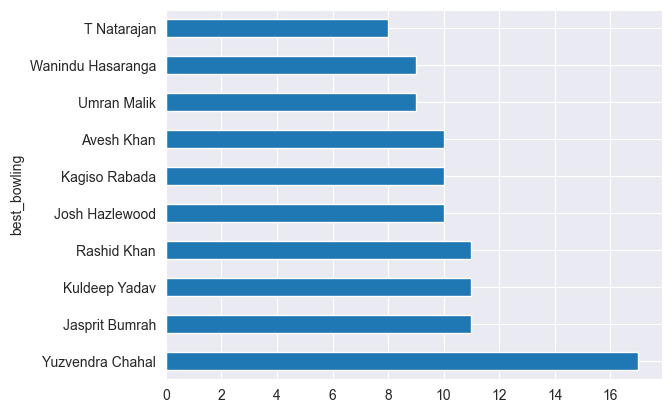

In [18]:
top_bowlers.plot(kind="barh")

### Most Matches Played by Venue

In [22]:
venue_count = df["venue"].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

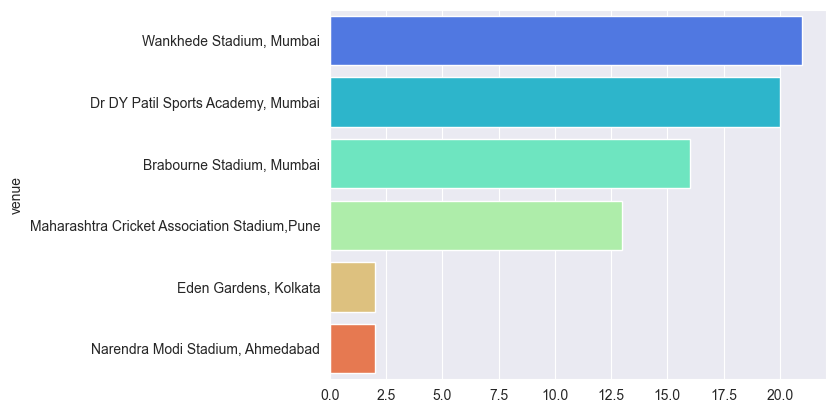

In [25]:
sns.barplot(y = venue_count.index, x = venue_count.values, palette = "rainbow")

### Who won the highest margin by runs?

In [32]:
df[df["won_by"] == "Runs"].sort_values(by = "margin", ascending = False).head(1)[["match_winner", "margin"]]

,match_winner,margin
54,Chennai,91


### Which player had the highest individual score?

In [36]:
df[df["highscore"] == df["highscore"].max()][["top_scorer", "highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


### Which bowler has the best bowling figures?

In [38]:
df[df["highest_wickets"] == df["highest_wickets"].max()][["best_bowling", "best_bowling_figure"]]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
